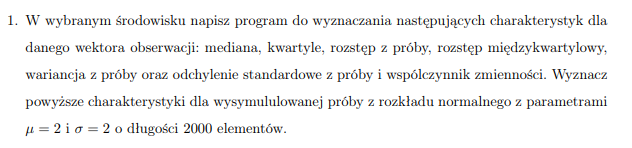


(array([  8.,  27., 139., 340., 581., 550., 262.,  77.,  14.,   2.]),
 array([-5.24852648, -3.7509165 , -2.25330651, -0.75569653,  0.74191345,
         2.23952344,  3.73713342,  5.23474341,  6.73235339,  8.22996337,
         9.72757336]),
 <BarContainer object of 10 artists>)

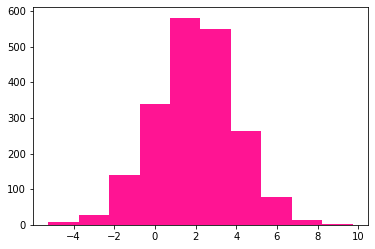

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import scipy.stats as st
from scipy.stats import norm, lognorm
mi=2
sigma=2
n=2000
x=np.random.normal(mi, sigma,n)
py.hist(x,color="deeppink")

### Mediana

In [3]:

def median(x):
    p = len(x)%2
    x.sort()
    if p ==0 and len(x)>1:
        arg1=int(np.floor(len(x)/2))
        arg2=int(np.floor(len(x)/2)-1)
        #print(arg1,arg2)
        return (x[arg1] +x[arg2])/2
        
    elif p!= 0 and len(x)>1:
        arg=int(np.floor(len(x)/2))
        print(arg)
        return x[arg]
    
    elif len(x)==1:
        return x[0]

#test=[3,3,6,6,3,4,5]
print(median(x))

import statistics
print(statistics.median(x))

2.0008593795757945
2.0008593795757945


### Kwartyle

In [4]:
def Q1(x):
    p = len(x)%2
    x.sort()
    if p!=0:
        args=x[:int((len(x)/2))]
        #print(args)
    if p==0:
        args=x[:int(np.floor(len(x)/2))]
        #print(args)
    return median(args)

def Q3(x):
    p = len(x)%2
    x.sort()
    if p!=0:
        args=x[int((len(x)/2)+1):]
        #print(args)
    if p==0:
        args=x[int(np.floor(len(x)/2)):]
        #print(args)
    return median(args)
        
test=[1,2,6,6,7,8,9,9]
print("Q1 =",Q1(x)," Q3 =",Q3(x))

        

Q1 = 0.6873788063277841  Q3 = 3.2680769221186705


### Rozstęp z próby

In [5]:
def R(x):
    return max(x)-min(x)
print("R = ", R(x))

R =  14.9760998393237


### Rozstęp międzykwartylowy

In [6]:
def IQR(x):
    return Q3(x)-Q1(x)

print("IQR = ",IQR(x))

IQR =  2.580698115790886


### Wariancja

In [10]:
def var(x):
    mean=np.sum(x)/len(x)
    s=0
    for i in range(0,len(x)):
        s=s+(x[i]-mean)**2
    return (1/(len(x)-1))*s
    
print("Var = ", var(x))

print(np.var(x))
print(statistics.variance(x))

Var =  3.8247981700208444
3.82288577093584
3.82479817002085


### Odchylenie standardowe

In [9]:
def sd(x):   #standard deviation
    return (var(x))**(1/2)

print("sd = ",sd(x))
statistics.stdev(x)

sd =  2.025371278432359


2.0253712784323588

### Współczynnik zmienności

In [10]:
def V(x):           #coefficient of variation
    return (sd(x)/(sum(x)/len(x)))*100

print("V = ",V(x),"%")
print((statistics.stdev(x)*100)/np.mean(x))

V =  97.49044651851055 %
97.4904465185105


# ZADANIE 2

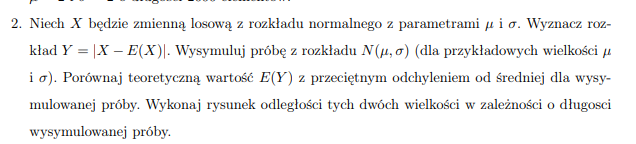

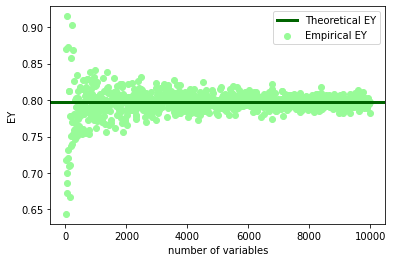

In [24]:
import numpy as np
import matplotlib.pyplot as plt

μ=0
σ=1
n = np.arange(10, 10000, 10)
d = []
EY=np.sqrt(2/np.pi)*σ

EX=μ
for i in n:
    X=np.random.normal(μ, σ, i)
    Y=abs(X-EX)
    d.append(sum(Y)/i)
    
plt.scatter(n, d, color="palegreen", label="Empirical EY")
plt.axhline(y=EY, color="darkgreen", linewidth=3,label="Theoretical EY")
plt.xlabel("number of variables")
plt.ylabel("EY")
plt.legend()
plt.show()

# ZADANIE 3

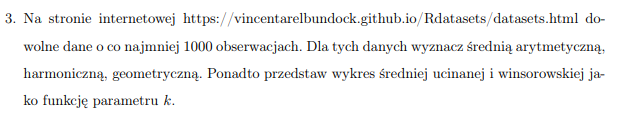

arytmetyczna: 30.397989417989415
harmoniczna: 13.669720885080313
geometryczna: 25.54833546512532
ucinana: 28.232142857142858
windsorowska: 28.404761904761905
756
28.48015873015873


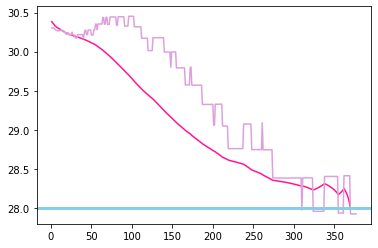

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import stats
from scipy.stats.mstats import winsorize


df = pd.read_csv("titanic.csv", usecols=['Age']).to_numpy()
ages = np.array([df[i][0] for i in range(len(df)) if not np.isnan(df[i][0])])
#ages = ages[ages != "NaN"]
#ages[405]

print("arytmetyczna:",sum(ages)/len(ages))    #arytmetyczna

def h_mean(x):                           #harmoniczna
    h = len(ages)/sum(1/x)
    return h

def g_mean(x):                           #geometryczna
    g =np.exp(sum(np.log(x))/len(x))
    return g

def u_mean(x,k):                         #ucinana
    k=int(k)
    x=np.sort(x)
    x=x[k:len(x)-k]
    return sum(x)/(len(x))

def w_mean(x,k):                   #windsorowska
    k=int(k)
    x=np.sort(x)
    l=len(x)
    return ((k*(x[k]))+np.sum(x[k+1:l-k-1])+(k*x[l-k-1]))/l

k=350
print("harmoniczna:",h_mean(ages))
print("geometryczna:",g_mean(ages))
print("ucinana:",u_mean(ages,k))
print("windsorowska:",w_mean(ages,k))

#ages=np.sort(ages)
print(len(ages))
#print(stats.trim_mean(ages, k/(len(ages))))
w=winsorize(ages, limits=[k/(len(ages)), k/(len(ages))])
print(np.mean(w))

k=np.arange(1, len(ages)/2,1)
plt.plot(k,[u_mean(ages,i) for i in k], color="deeppink" )
plt.plot(k,[w_mean(ages,i)for i in k], color="plum" )
plt.axhline(y=median(ages), color="skyblue", linewidth=3,label="Theoretical EY")
#median(ages)

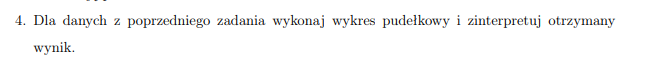

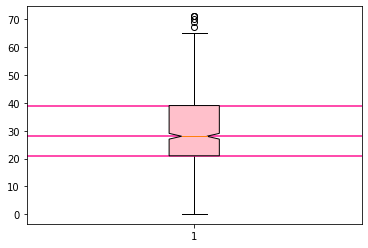

In [33]:
bp = plt.boxplot(ages, vert=True, notch=True, patch_artist= True,boxprops=dict(facecolor="pink"))
plt.axhline(y=Q1(ages), color="deeppink", linestyle='-')
plt.axhline(median(ages), color="deeppink", linestyle='-')
plt.axhline(y=Q3(ages), color="deeppink", linestyle='-',)